In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sqlalchemy import create_engine

In [3]:
data_q1 = pd.read_csv('/content/Divvy_Trips_2019_Q1.csv')

In [4]:
data_q2 = pd.read_csv('/content/Divvy_Trips_2019_Q2.csv')

In [5]:
data_q3 = pd.read_csv('/content/Divvy_Trips_2019_Q3.csv')

In [6]:
data_q4 = pd.read_csv('/content/Divvy_Trips_2019_Q4.csv')

In [7]:
data_q1.tail()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
365064,22178524,2019-03-31 23:51:32,2019-04-01 00:04:09,1501,757.0,38,Clark St & Lake St,29,Noble St & Milwaukee Ave,Subscriber,Male,1993.0
365065,22178525,2019-03-31 23:52:37,2019-03-31 23:58:09,3270,332.0,129,Blue Island Ave & 18th St,202,Halsted St & 18th St,Subscriber,Male,1992.0
365066,22178526,2019-03-31 23:52:38,2019-04-01 00:06:44,3584,846.0,283,LaSalle St & Jackson Blvd,273,Michigan Ave & 18th St,Subscriber,Male,1984.0
365067,22178527,2019-03-31 23:53:08,2019-03-31 23:56:06,4384,178.0,321,Wabash Ave & 9th St,39,Wabash Ave & Adams St,Subscriber,Male,1969.0
365068,22178528,2019-03-31 23:53:48,2019-04-01 00:01:16,5589,448.0,248,Woodlawn Ave & 55th St,247,Shore Dr & 55th St,Subscriber,Male,1998.0


In [8]:
data_q2.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [9]:
merged_df = pd.concat([data_q1, data_q2,data_q3,data_q4], ignore_index=True)

In [10]:
merged_data_Q3Q4 = pd.concat([data_q3,data_q4],ignore_index= True)

In [11]:
merged_data_Q3Q4

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2344767,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0
2344768,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0
2344769,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0
2344770,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0


In [12]:
merged_data_Q3Q4.to_csv("cyclist_2019_Q2Q3_Data.csv",index=False)

In [13]:
merged_data_Q3Q4.head()


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [14]:
merged_data_Q3Q4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2344772 entries, 0 to 2344771
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   trip_id            int64  
 1   start_time         object 
 2   end_time           object 
 3   bikeid             int64  
 4   tripduration       object 
 5   from_station_id    int64  
 6   from_station_name  object 
 7   to_station_id      int64  
 8   to_station_name    object 
 9   usertype           object 
 10  gender             object 
 11  birthyear          float64
dtypes: float64(1), int64(4), object(7)
memory usage: 214.7+ MB


In [15]:
merged_data_Q3Q4.describe()

,trip_id,bikeid,from_station_id,to_station_id,birthyear
count,2.344772e+06,2.344772e+06,2.344772e+06,2.344772e+06,2.004997e+06
mean,2.473312e+07,3.363821e+03,2.028668e+02,2.039148e+02,1.984552e+03
std,7.106488e+05,1.896561e+03,1.570433e+02,1.570719e+02,1.077792e+01
min,2.347939e+07,1.000000e+00,2.000000e+00,2.000000e+00,1.888000e+03
25%,2.412106e+07,1.715000e+03,7.700000e+01,7.700000e+01,1.980000e+03
50%,2.473690e+07,3.436000e+03,1.740000e+02,1.750000e+02,1.988000e+03
75%,2.534684e+07,5.016000e+03,2.900000e+02,2.910000e+02,1.992000e+03
max,2.596290e+07,6.946000e+03,6.730000e+02,6.730000e+02,2.003000e+03


In [16]:
print(merged_data_Q3Q4.isnull().sum())

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               353941
birthyear            339775
dtype: int64


In [17]:
merged_data_Q3Q4['gender'].fillna('Unknown', inplace=True)


<ipython-input-17-710a3096997c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data_Q3Q4['gender'].fillna('Unknown', inplace=True)


In [18]:
print(merged_data_Q3Q4.isnull().sum())

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender                    0
birthyear            339775
dtype: int64


In [19]:
merged_data_Q3Q4['birthyear'].fillna(merged_data_Q3Q4['birthyear'].median(), inplace=True)

<ipython-input-19-2a124d8b84cc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data_Q3Q4['birthyear'].fillna(merged_data_Q3Q4['birthyear'].median(), inplace=True)


In [20]:
print(merged_data_Q3Q4.isnull().sum())

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64


In [21]:
print(merged_data_Q3Q4.describe())

            trip_id        bikeid  from_station_id  to_station_id  \
count  2.344772e+06  2.344772e+06     2.344772e+06   2.344772e+06   
mean   2.473312e+07  3.363821e+03     2.028668e+02   2.039148e+02   
std    7.106488e+05  1.896561e+03     1.570433e+02   1.570719e+02   
min    2.347939e+07  1.000000e+00     2.000000e+00   2.000000e+00   
25%    2.412106e+07  1.715000e+03     7.700000e+01   7.700000e+01   
50%    2.473690e+07  3.436000e+03     1.740000e+02   1.750000e+02   
75%    2.534684e+07  5.016000e+03     2.900000e+02   2.910000e+02   
max    2.596290e+07  6.946000e+03     6.730000e+02   6.730000e+02   

          birthyear  
count  2.344772e+06  
mean   1.985052e+03  
std    1.004008e+01  
min    1.888000e+03  
25%    1.982000e+03  
50%    1.988000e+03  
75%    1.992000e+03  
max    2.003000e+03  


In [22]:
merged_data_Q3Q4.drop_duplicates(inplace=True)

In [23]:
print(merged_data_Q3Q4.isnull().sum())

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64


In [24]:
merged_data_Q3Q4.dropna(subset=['start_time', 'end_time'], inplace=True)


In [25]:
merged_data_Q3Q4['from_station_id'].fillna(merged_data_Q3Q4['from_station_id'].mode()[0], inplace=True)
merged_data_Q3Q4['from_station_name'].fillna('Unknown', inplace=True)


<ipython-input-25-99b0e9fc27df>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data_Q3Q4['from_station_id'].fillna(merged_data_Q3Q4['from_station_id'].mode()[0], inplace=True)
<ipython-input-25-99b0e9fc27df>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [26]:
merged_data_Q3Q4['to_station_id'].fillna(merged_data_Q3Q4['to_station_id'].mode()[0], inplace=True)
merged_data_Q3Q4['to_station_name'].fillna('Unknown', inplace=True)


<ipython-input-26-c6e1a97ace80>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data_Q3Q4['to_station_id'].fillna(merged_data_Q3Q4['to_station_id'].mode()[0], inplace=True)
<ipython-input-26-c6e1a97ace80>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

In [27]:
merged_data_Q3Q4.dropna(subset=['usertype'], inplace=True)


In [28]:
print(merged_data_Q3Q4.isnull().sum())

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64


In [31]:
merged_data_Q3Q4['start_time'] = pd.to_datetime(merged_data_Q3Q4['start_time'])
merged_data_Q3Q4['end_time'] = pd.to_datetime(merged_data_Q3Q4['end_time'])

In [32]:
merged_data_Q3Q4['time_difference'] = (merged_data_Q3Q4['end_time'] - merged_data_Q3Q4['start_time']).dt.total_seconds()


In [33]:
merged_data_Q3Q4


,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,time_difference
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0,1214.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,Unknown,1988.0,1048.0
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,Unknown,1988.0,1554.0
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,Unknown,1988.0,1503.0
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,Unknown,1988.0,1213.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2344767,25962900,2019-12-31 23:56:13,2020-01-01 00:15:45,2196,"1,172.0",112,Green St & Randolph St,225,Halsted St & Dickens Ave,Subscriber,Male,1981.0,1172.0
2344768,25962901,2019-12-31 23:56:34,2020-01-01 00:22:08,4877,"1,533.0",90,Millennium Park,90,Millennium Park,Subscriber,Male,1992.0,1534.0
2344769,25962902,2019-12-31 23:57:05,2020-01-01 00:05:46,863,520.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Male,1967.0,521.0
2344770,25962903,2019-12-31 23:57:11,2020-01-01 00:05:45,2637,514.0,623,Michigan Ave & 8th St,52,Michigan Ave & Lake St,Subscriber,Female,1970.0,514.0


In [37]:
value_counts = merged_data_Q3Q4['usertype'].value_counts()


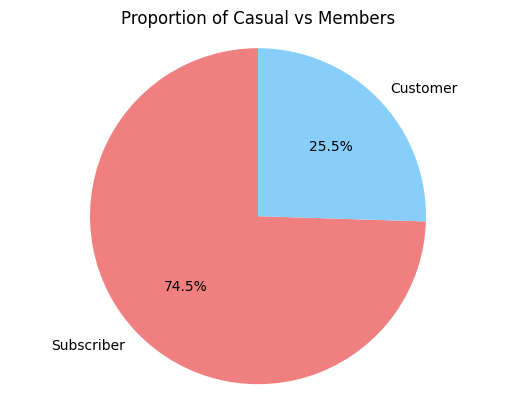

In [38]:
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Casual vs Members')
plt.axis('equal')  # Ensures the pie chart is circular
plt.show()

In [39]:
sum_of_rows_with_null_values = merged_data_Q3Q4.isnull().any(axis=1).sum()
print(f"Total Null rows: {sum_of_rows_with_null_values}")

Total Null rows: 0


In [41]:
total_duplicate_rows = merged_data_Q3Q4.duplicated().sum()
print(f"Duplicate rows: {total_duplicate_rows}")


Duplicate rows: 0


In [43]:
merged_data_Q3Q4.sort_values(by=["end_time"], inplace=True, ascending=False)
print(merged_data_Q3Q4)


          trip_id          start_time            end_time  bikeid  \
1893885  25487192 2019-10-19 15:14:50 2020-01-21 13:54:35    1083   
1715905  25302386 2019-10-06 13:57:02 2020-01-13 21:55:24    6232   
2201331  25811874 2019-12-03 11:12:34 2020-01-10 01:06:36    1426   
2271354  25886030 2019-12-14 12:21:03 2020-01-06 13:46:17    5723   
2334973  25952624 2019-12-28 18:37:26 2020-01-06 12:57:27    1157   
...           ...                 ...                 ...     ...   
20       23479408 2019-07-01 00:08:24 2019-07-01 00:20:07    2447   
23       23479411 2019-07-01 00:10:20 2019-07-01 00:19:36    3632   
22       23479410 2019-07-01 00:08:45 2019-07-01 00:19:24    3249   
1        23479389 2019-07-01 00:01:16 2019-07-01 00:18:44    5353   
5        23479393 2019-07-01 00:02:21 2019-07-01 00:07:31    4941   

        tripduration  from_station_id          from_station_name  \
1893885  8,120,385.0              529       Cicero Ave & Lake St   
1715905  8,585,902.0              4

In [44]:
ride_length = merged_data_Q3Q4["end_time"] - merged_data_Q3Q4["start_time"]
ride_length = np.round(ride_length.dt.total_seconds() / 60, 2)
merged_data_Q3Q4["ride_length"] = ride_length

In [45]:
merged_data_Q3Q4["day_of_week"] = merged_data_Q3Q4["start_time"].dt.day_name()


In [46]:
merged_data_Q3Q4["month"] = pd.DatetimeIndex(merged_data_Q3Q4["start_time"]).month
merged_data_Q3Q4["month_name"] = merged_data_Q3Q4["start_time"].dt.strftime("%b")
print(merged_data_Q3Q4)

          trip_id          start_time            end_time  bikeid  \
1893885  25487192 2019-10-19 15:14:50 2020-01-21 13:54:35    1083   
1715905  25302386 2019-10-06 13:57:02 2020-01-13 21:55:24    6232   
2201331  25811874 2019-12-03 11:12:34 2020-01-10 01:06:36    1426   
2271354  25886030 2019-12-14 12:21:03 2020-01-06 13:46:17    5723   
2334973  25952624 2019-12-28 18:37:26 2020-01-06 12:57:27    1157   
...           ...                 ...                 ...     ...   
20       23479408 2019-07-01 00:08:24 2019-07-01 00:20:07    2447   
23       23479411 2019-07-01 00:10:20 2019-07-01 00:19:36    3632   
22       23479410 2019-07-01 00:08:45 2019-07-01 00:19:24    3249   
1        23479389 2019-07-01 00:01:16 2019-07-01 00:18:44    5353   
5        23479393 2019-07-01 00:02:21 2019-07-01 00:07:31    4941   

        tripduration  from_station_id          from_station_name  \
1893885  8,120,385.0              529       Cicero Ave & Lake St   
1715905  8,585,902.0              4

In [47]:
merged_data_Q3Q4.drop(columns=['time_difference'], inplace=True)
merged_data_Q3Q4

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,ride_length,day_of_week,month,month_name
1893885,25487192,2019-10-19 15:14:50,2020-01-21 13:54:35,1083,"8,120,385.0",529,Cicero Ave & Lake St,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),Customer,Unknown,1988.0,135279.75,Saturday,10,Oct
1715905,25302386,2019-10-06 13:57:02,2020-01-13 21:55:24,6232,"8,585,902.0",435,Kedzie Ave & Roosevelt Rd,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),Customer,Unknown,1988.0,143038.37,Sunday,10,Oct
2201331,25811874,2019-12-03 11:12:34,2020-01-10 01:06:36,1426,"3,246,842.0",41,Federal St & Polk St,204,Prairie Ave & Garfield Blvd,Customer,Female,1982.0,54114.03,Tuesday,12,Dec
2271354,25886030,2019-12-14 12:21:03,2020-01-06 13:46:17,5723,"1,992,314.0",532,Austin Blvd & Lake St,671,HUBBARD ST BIKE CHECKING (LBS-WH-TEST),Customer,Unknown,1988.0,33205.23,Saturday,12,Dec
2334973,25952624,2019-12-28 18:37:26,2020-01-06 12:57:27,1157,"757,200.0",321,Wabash Ave & 9th St,176,Clark St & Elm St,Customer,Unknown,1988.0,12620.02,Saturday,12,Dec
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,23479408,2019-07-01 00:08:24,2019-07-01 00:20:07,2447,703.0,239,Western Ave & Leland Ave,455,Maplewood Ave & Peterson Ave,Subscriber,Male,1970.0,11.72,Monday,7,Jul
23,23479411,2019-07-01 00:10:20,2019-07-01 00:19:36,3632,556.0,76,Lake Shore Dr & Monroe St,59,Wabash Ave & Roosevelt Rd,Customer,Unknown,1988.0,9.27,Monday,7,Jul
22,23479410,2019-07-01 00:08:45,2019-07-01 00:19:24,3249,639.0,309,Leavitt St & Armitage Ave,113,Bissell St & Armitage Ave,Customer,Unknown,1988.0,10.65,Monday,7,Jul
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,Unknown,1988.0,17.47,Monday,7,Jul


In [48]:
merged_data_Q3Q4.describe()

,trip_id,start_time,end_time,bikeid,from_station_id,to_station_id,birthyear,ride_length,month
count,2.344772e+06,2344772,2344772,2.344772e+06,2.344772e+06,2.344772e+06,2.344772e+06,2.344772e+06,2.344772e+06
mean,2.473312e+07,2019-09-08 15:24:27.310192640,2019-09-08 15:50:43.534427904,3.363821e+03,2.028668e+02,2.039148e+02,1.985052e+03,2.627040e+01,8.781045e+00
min,2.347939e+07,2019-07-01 00:00:27,2019-07-01 00:07:31,1.000000e+00,2.000000e+00,2.000000e+00,1.888000e+03,-5.637000e+01,7.000000e+00
25%,2.412106e+07,2019-08-02 13:15:23.750000128,2019-08-02 13:44:22.500000,1.715000e+03,7.700000e+01,7.700000e+01,1.982000e+03,7.070000e+00,8.000000e+00
50%,2.473690e+07,2019-09-02 13:49:07,2019-09-02 14:28:30,3.436000e+03,1.740000e+02,1.750000e+02,1.988000e+03,1.220000e+01,9.000000e+00
75%,2.534684e+07,2019-10-09 06:39:38.249999872,2019-10-09 06:54:07.500000,5.016000e+03,2.900000e+02,2.910000e+02,1.992000e+03,2.203000e+01,1.000000e+01
max,2.596290e+07,2019-12-31 23:57:17,2020-01-21 13:54:35,6.946000e+03,6.730000e+02,6.730000e+02,2.003000e+03,1.509439e+05,1.200000e+01
std,7.106488e+05,NaN,NaN,1.896561e+03,1.570433e+02,1.570719e+02,1.004008e+01,5.880381e+02,1.486809e+00


In [50]:
neg_ride_length = merged_data_Q3Q4[merged_data_Q3Q4["ride_length"] < 0]
print(f"Rows with negative ride length value {neg_ride_length}")


Rows with negative ride length value           trip_id          start_time            end_time  bikeid  \
2025204  25625839 2019-11-03 01:48:04 2019-11-03 01:16:48    2214   
2025201  25625836 2019-11-03 01:46:01 2019-11-03 01:10:44    6329   
2025196  25625830 2019-11-03 01:43:21 2019-11-03 01:09:56    4141   
2025215  25625851 2019-11-03 01:58:17 2019-11-03 01:08:27    6133   
2025211  25625847 2019-11-03 01:53:24 2019-11-03 01:06:08    3984   
2025209  25625845 2019-11-03 01:53:08 2019-11-03 01:04:53    2142   
2025210  25625846 2019-11-03 01:53:10 2019-11-03 01:04:53    5877   
2025208  25625844 2019-11-03 01:51:55 2019-11-03 01:04:33    3338   
2025205  25625841 2019-11-03 01:50:31 2019-11-03 01:04:25    4179   
2025207  25625843 2019-11-03 01:51:59 2019-11-03 01:03:02    2920   
2025203  25625838 2019-11-03 01:47:49 2019-11-03 01:02:40     964   
2025213  25625849 2019-11-03 01:55:33 2019-11-03 01:01:52    5059   
2025214  25625850 2019-11-03 01:57:48 2019-11-03 01:01:26    5310 

In [51]:
merged_data_Q3Q4 = merged_data_Q3Q4[merged_data_Q3Q4["ride_length"] > 0]


In [52]:
merged_data_Q3Q4.describe()

,trip_id,start_time,end_time,bikeid,from_station_id,to_station_id,birthyear,ride_length,month
count,2.344759e+06,2344759,2344759,2.344759e+06,2.344759e+06,2.344759e+06,2.344759e+06,2.344759e+06,2.344759e+06
mean,2.473312e+07,2019-09-08 15:24:00.755145728,2019-09-08 15:50:17.003248640,3.363817e+03,2.028663e+02,2.039144e+02,1.985052e+03,2.627080e+01,8.781033e+00
min,2.347939e+07,2019-07-01 00:00:27,2019-07-01 00:07:31,1.000000e+00,2.000000e+00,2.000000e+00,1.888000e+03,1.020000e+00,7.000000e+00
25%,2.412105e+07,2019-08-02 13:15:08.500000,2019-08-02 13:44:13,1.715000e+03,7.700000e+01,7.700000e+01,1.982000e+03,7.070000e+00,8.000000e+00
50%,2.473690e+07,2019-09-02 13:49:03,2019-09-02 14:28:19,3.436000e+03,1.740000e+02,1.750000e+02,1.988000e+03,1.220000e+01,9.000000e+00
75%,2.534683e+07,2019-10-09 06:38:39,2019-10-09 06:53:48.500000,5.016000e+03,2.900000e+02,2.910000e+02,1.992000e+03,2.203000e+01,1.000000e+01
max,2.596290e+07,2019-12-31 23:57:17,2020-01-21 13:54:35,6.946000e+03,6.730000e+02,6.730000e+02,2.003000e+03,1.509439e+05,1.200000e+01
std,7.106477e+05,NaN,NaN,1.896562e+03,1.570432e+02,1.570719e+02,1.004010e+01,5.880397e+02,1.486804e+00


In [53]:
# TOTAL NUMBER OF RIDERS PER CATEGORY

total_riders = merged_data_Q3Q4["usertype"].value_counts()
print(f"Number of riders per category \n {total_riders}")

Number of riders per category 
 usertype
Subscriber    1746877
Customer       597882
Name: count, dtype: int64


In [54]:
# Confirm the total number of bike-share riders
total_riders_using_id = merged_data_Q3Q4.groupby(["usertype"])["trip_id"].count()
print(f"Total riders using ride_id \n {total_riders_using_id}")

Total riders using ride_id 
 usertype
Customer       597882
Subscriber    1746877
Name: trip_id, dtype: int64


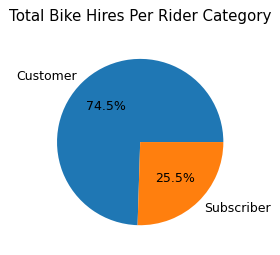

In [55]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)
labels = ["Customer", "Subscriber"]
plt.pie(x=total_riders, autopct="%.1f%%", labels=labels)
ax.set_title("Total Bike Hires Per Rider Category", pad=14, loc="center")
plt.show()

In [56]:
ride_hires_per_month = (
    merged_data_Q3Q4["month"]
    .value_counts(sort=False)
    .rename_axis("Month")
    .reset_index(name="Total Hires")
)

In [59]:
months = [
    # "Jan",
    # "Feb",
    # "Mar",
    # "Apr",
    # "May",
    # "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
print(ride_hires_per_month)

   Month  Total Hires
0     10       371786
1     12       155092
2     11       177163
3      9       493219
4      8       590184
5      7       557315


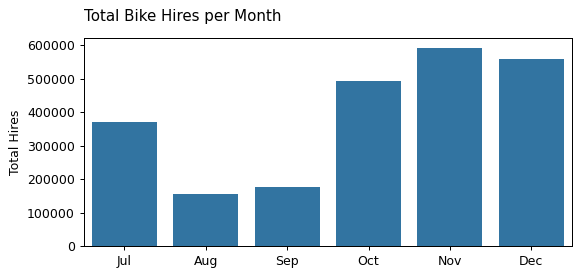

In [60]:
plt.figure(figsize=(7, 3), dpi=90)
plt.title("Total Bike Hires per Month", loc="left", pad=14)
sns.barplot(data=ride_hires_per_month, x=months, y="Total Hires")
plt.show()

In [61]:
ride_hires_per_day = (
    merged_data_Q3Q4["day_of_week"]
    .value_counts()
    .rename_axis("Day")
    .reset_index(name="Total Hires")
)
ride_hires_per_day.sort_values(by=["Total Hires"], inplace=True, ascending=True)
print(ride_hires_per_day)

         Day  Total Hires
6     Sunday       267426
5   Saturday       309202
4     Friday       343048
3  Wednesday       353404
2     Monday       353427
1   Thursday       358664
0    Tuesday       359588


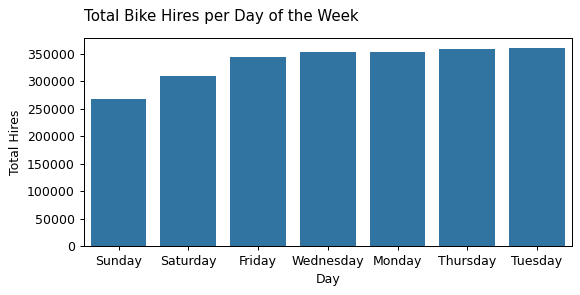

In [62]:
plt.figure(figsize=(7, 3), dpi=90)
plt.title("Total Bike Hires per Day of the Week", loc="left", pad=14)
sns.barplot(data=ride_hires_per_day, x="Day", y="Total Hires")
plt.show()

In [64]:
monthly_bike_hires_per_customer_category = merged_data_Q3Q4.groupby(["usertype"])[
    "month_name"
].value_counts(sort=True)

In [65]:
monthly_casual_member_df = pd.DataFrame()
monthly_casual_member_df["Customer"] = monthly_bike_hires_per_customer_category["Customer"]
monthly_casual_member_df["Subscriber"] = monthly_bike_hires_per_customer_category["Subscriber"]
monthly_casual_member_df["Month"] = monthly_casual_member_df.index


In [66]:
print(monthly_casual_member_df)

            Customer  Subscriber Month
month_name                            
Aug           186889      403295   Aug
Jul           175632      381683   Jul
Sep           129173      364046   Sep
Oct            71035      300751   Oct
Nov            18723      158440   Nov
Dec            16430      138662   Dec


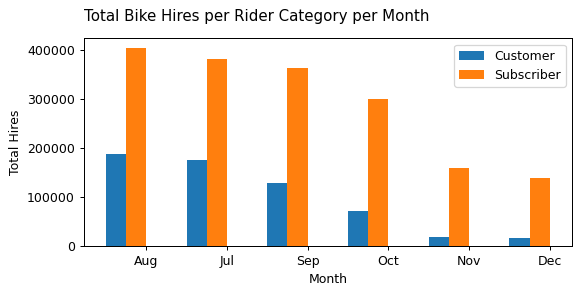

In [101]:
pos = list(range(len(monthly_casual_member_df["Customer"])))
width = 0.25

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

plt.bar(pos, monthly_casual_member_df["Customer"], width)
plt.bar([p + width for p in pos], monthly_casual_member_df["Subscriber"], width)

# Setting the y and x axis label
ax.set_ylabel("Total Hires")
ax.set_xlabel("Month")

# Setting the chart's title
ax.set_title("Total Bike Hires per Rider Category per Month", loc="left", pad=14)


# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(monthly_casual_member_df["Month"])

# Adding the legend and showing the plot
plt.legend(["Customer", "Subscriber"], loc="upper right")
plt.show()


In [76]:
#  BIKE HIRES PER CATEGORY PER DAY
# Find out how ridership compares everyday for the two rider categories

bike_hires_per_customer_category = merged_data_Q3Q4.groupby(["usertype"])[
    "day_of_week"
].value_counts(sort=True)
print(bike_hires_per_customer_category)

usertype    day_of_week
Customer    Saturday       137232
            Sunday         111075
            Friday          81158
            Thursday        73681
            Monday          72020
            Wednesday       62355
            Tuesday         60361
Subscriber  Tuesday        299227
            Wednesday      291049
            Thursday       284983
            Monday         281407
            Friday         261890
            Saturday       171970
            Sunday         156351
Name: count, dtype: int64


In [77]:
casual_member_df = pd.DataFrame()
casual_member_df["Customer"] = bike_hires_per_customer_category["Customer"]
casual_member_df["Subscriber"] = bike_hires_per_customer_category["Subscriber"]
casual_member_df["Day"] = casual_member_df.index


In [78]:
print(casual_member_df)

             Customer  Subscriber        Day
day_of_week                                 
Saturday       137232      171970   Saturday
Sunday         111075      156351     Sunday
Friday          81158      261890     Friday
Thursday        73681      284983   Thursday
Monday          72020      281407     Monday
Wednesday       62355      291049  Wednesday
Tuesday         60361      299227    Tuesday


In [80]:
pos = list(range(len(casual_member_df["Customer"])))
width = 0.25

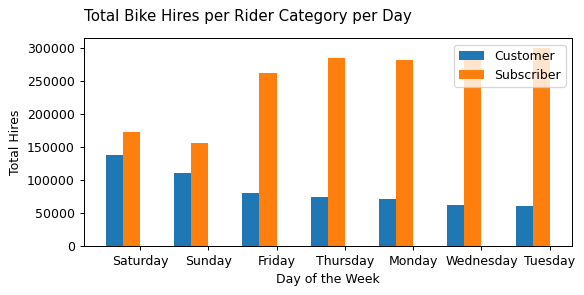

In [89]:
fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

plt.bar(pos, casual_member_df["Customer"], width)
plt.bar([p + width for p in pos], casual_member_df["Subscriber"], width)
# Setting the y and x axis label
ax.set_ylabel("Total Hires")
ax.set_xlabel("Day of the Week")
# Setting the chart's title
ax.set_title("Total Bike Hires per Rider Category per Day", loc="left", pad=14)

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(casual_member_df["Day"])

# Adding the legend and showing the plot
plt.legend(["Customer", "Subscriber"], loc="upper right")
plt.show()

The average ride length per category usertype
Customer      60.518606
Subscriber    14.549229
Name: ride_length, dtype: float64


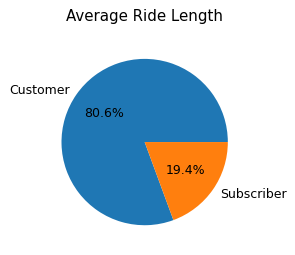

In [90]:
# AVERAGE RIDE LENGTH PER CATEGORY

average_ride_length = merged_data_Q3Q4.groupby(["usertype"])["ride_length"].mean()
print(f"The average ride length per category {average_ride_length}")

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)
labels = ["Customer", "Subscriber"]
plt.pie(x=average_ride_length, autopct="%.1f%%", labels=labels)
ax.set_title("Average Ride Length", pad=14, loc="center")
plt.show()


In [91]:
# AVERAGE RIDE LENGTH FOR RIDERS BY DAY OF THE WEEK

average_daily_ride_length = merged_data_Q3Q4.groupby(["usertype", "day_of_week"])[
    "ride_length"
].mean()
print(f"Average ride lenth per category per day {average_daily_ride_length}")

weekly_average_ride_length_df = pd.DataFrame()

weekly_average_ride_length_df["Customer"] = average_daily_ride_length["Customer"]
weekly_average_ride_length_df["Subscriber"] = average_daily_ride_length["Subscriber"]
weekly_average_ride_length_df["Day"] = weekly_average_ride_length_df.index

print(weekly_average_ride_length_df)

Average ride lenth per category per day usertype    day_of_week
Customer    Friday         65.939899
            Monday         58.662921
            Saturday       55.351624
            Sunday         60.426218
            Thursday       60.878373
            Tuesday        62.058032
            Wednesday      65.226701
Subscriber  Friday         13.963116
            Monday         14.290195
            Saturday       16.698579
            Sunday         15.034455
            Thursday       14.205966
            Tuesday        14.524073
            Wednesday      14.158413
Name: ride_length, dtype: float64
              Customer  Subscriber        Day
day_of_week                                  
Friday       65.939899   13.963116     Friday
Monday       58.662921   14.290195     Monday
Saturday     55.351624   16.698579   Saturday
Sunday       60.426218   15.034455     Sunday
Thursday     60.878373   14.205966   Thursday
Tuesday      62.058032   14.524073    Tuesday
Wednesday    65.

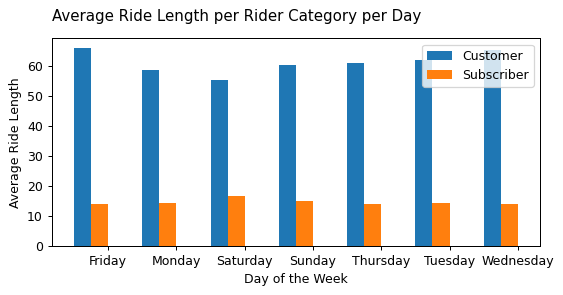

In [94]:
pos = list(range(len(weekly_average_ride_length_df["Customer"])))
width = 0.25

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

plt.bar(pos, weekly_average_ride_length_df["Customer"], width)
plt.bar([p + width for p in pos], weekly_average_ride_length_df["Subscriber"], width)

# Setting the y and x axis label
ax.set_ylabel("Average Ride Length")
ax.set_xlabel("Day of the Week")
# Setting the chart's title
ax.set_title("Average Ride Length per Rider Category per Day", loc="left", pad=14)

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(weekly_average_ride_length_df["Day"])

# Adding the legend and showing the plot
plt.legend(["Customer", "Subscriber"], loc="upper right")
plt.show()

In [96]:
# AVERAGE RIDE LENGTH FOR RIDERS BY MONTH

average_daily_ride_length_per_month = merged_data_Q3Q4.groupby(["usertype", "month"])[
    "ride_length"
].mean()
print(f"Average ride lenth per category per day {average_daily_ride_length_per_month}")

monthly_average_ride_length_df = pd.DataFrame()

monthly_average_ride_length_df["Customer"] = average_daily_ride_length_per_month["Customer"]
monthly_average_ride_length_df["Subscriber"] = average_daily_ride_length_per_month["Subscriber"]
monthly_average_ride_length_df["month"] = monthly_average_ride_length_df.index

print(monthly_average_ride_length_df)

Average ride lenth per category per day usertype    month
Customer    7        59.783833
            8        67.007522
            9        51.666709
            10       58.992163
            11       67.032770
            12       63.332669
Subscriber  7        16.433329
            8        16.185540
            9        14.130642
            10       13.030891
            11       12.432073
            12       11.415163
Name: ride_length, dtype: float64
        Customer  Subscriber  month
month                              
7      59.783833   16.433329      7
8      67.007522   16.185540      8
9      51.666709   14.130642      9
10     58.992163   13.030891     10
11     67.032770   12.432073     11
12     63.332669   11.415163     12


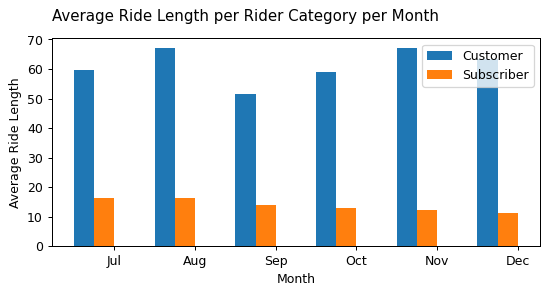

In [98]:
pos = list(range(len(monthly_average_ride_length_df["Customer"])))
width = 0.25

fig, ax = plt.subplots(figsize=(7, 3), dpi=90)

plt.bar(pos, monthly_average_ride_length_df["Customer"], width)
plt.bar([p + width for p in pos], monthly_average_ride_length_df["Subscriber"], width)

# Setting the y and x axis label
ax.set_ylabel("Average Ride Length")
ax.set_xlabel("Month")
# Setting the chart's title
ax.set_title("Average Ride Length per Rider Category per Month", loc="left", pad=14)

# Setting the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Setting the labels for the x ticks
ax.set_xticklabels(months)

# Adding the legend and showing the plot
plt.legend(["Customer", "Subscriber"], loc="upper right")
plt.show()

In [100]:
# RIDEABLE TYPE PER RIDER CATEGORY
type_of_bike = merged_data_Q3Q4.groupby(["usertype"])["rideable_type"].value_counts()
print(type_of_bike)

KeyError: 'Column not found: rideable_type'